In [66]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

Загрузим данные в датасет housing

In [56]:
california_housing = fetch_california_housing(as_frame=True)
# print(california_housing.DESCR)

In [4]:
housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

housing.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


Целевую переменную сохраним в housing_target

In [57]:
housing_target = pd.DataFrame(california_housing.target)
housing_target.head(3)

,MedHouseVal
0,4.526
1,3.585
2,3.521


Проверим данные на пропуски 

In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Подготовим данные для моделей


In [38]:
X = housing
y = housing_target

Построим модель линейной регрессии и получим метрику точности Score

In [68]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Score = ', model.score(X_test, y_test))

Score =  0.575787706032451


Построим модель регрессионного дерева и получим метрику Score

In [100]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=3, criterion='friedman_mse', random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  
model = dtr.fit(X_train, y_train)
print('Score = ', dtr.score(X_test, y_test))

Score =  0.669692328562036


С изменением критерия

In [101]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=3, criterion='squared_error', random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  
model = dtr.fit(X_train, y_train)
print('Score = ', dtr.score(X_test, y_test))

Score =  0.6701039607143126


In [82]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_0 <= 5.09
|   |--- feature_0 <= 3.07
|   |   |--- feature_2 <= 4.31
|   |   |   |--- value: [1.63]
|   |   |--- feature_2 >  4.31
|   |   |   |--- value: [1.17]
|   |--- feature_0 >  3.07
|   |   |--- feature_5 <= 2.42
|   |   |   |--- value: [2.74]
|   |   |--- feature_5 >  2.42
|   |   |   |--- value: [1.87]
|--- feature_0 >  5.09
|   |--- feature_0 <= 6.89
|   |   |--- feature_5 <= 2.67
|   |   |   |--- value: [3.52]
|   |   |--- feature_5 >  2.67
|   |   |   |--- value: [2.64]
|   |--- feature_0 >  6.89
|   |   |--- feature_0 <= 7.82
|   |   |   |--- value: [3.77]
|   |   |--- feature_0 >  7.82
|   |   |   |--- value: [4.58]



Построение графа при глубине дерева max_depth=3

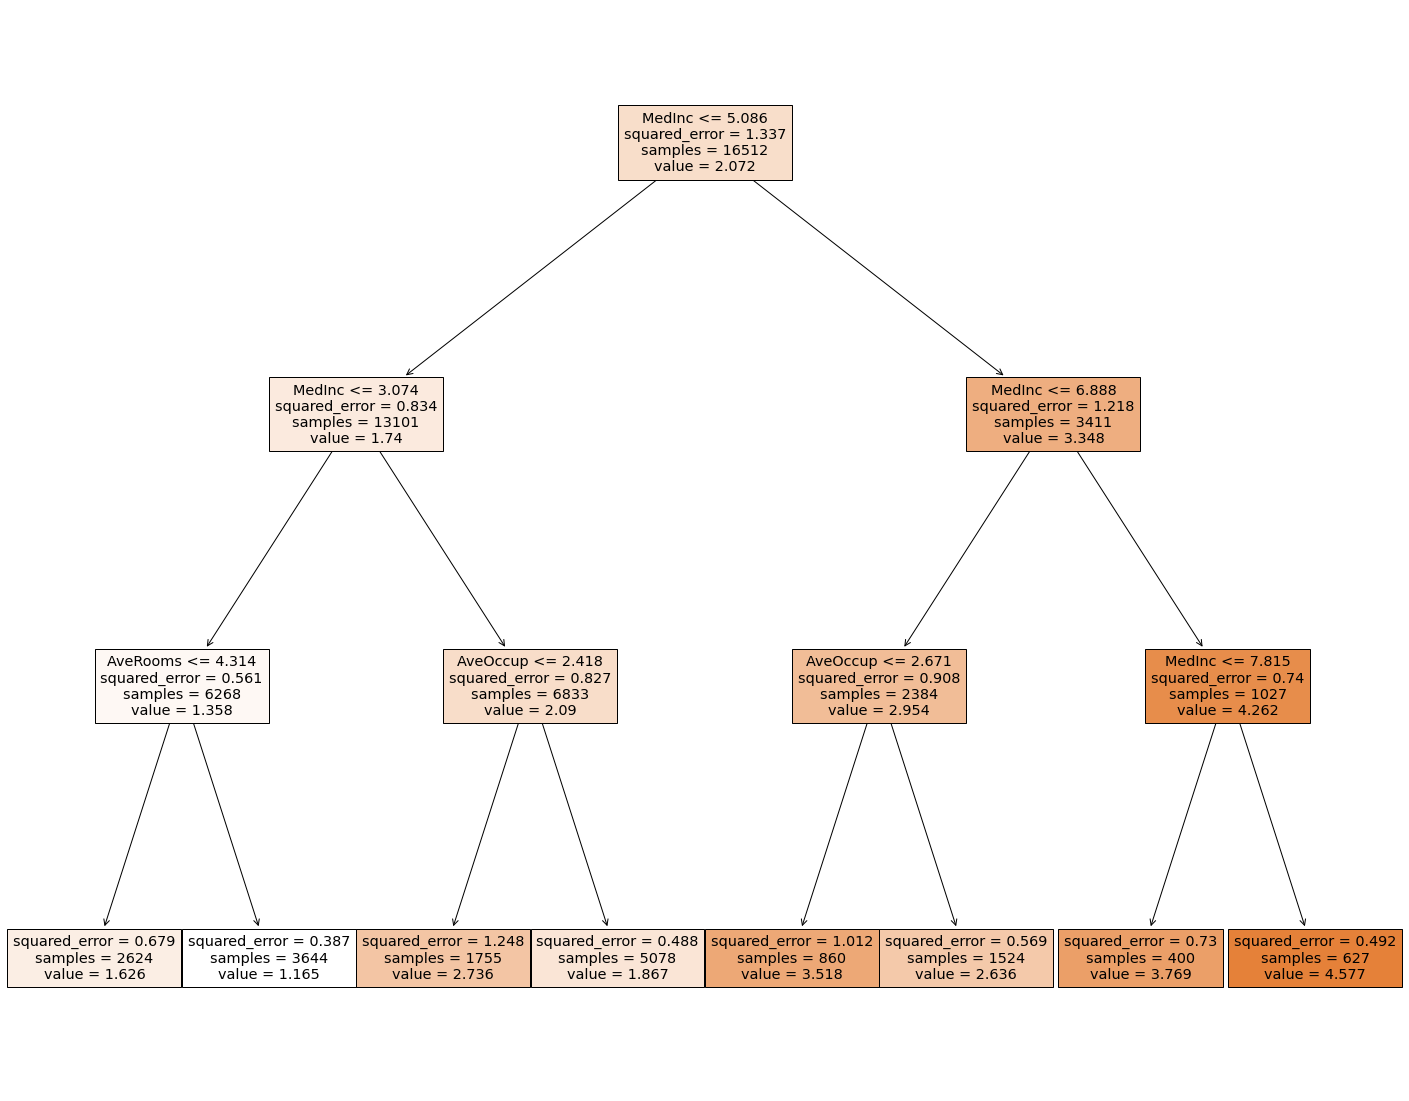

In [83]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, feature_names=california_housing.feature_names, filled=True)

#### Вывод:
При сравнении моделей очевидно, что регрессионное дерево дает более высокую точность предсказаний, если не ограничивать глубину дерева. Но визуализировать граф при этом уже не удается . 

Оптимизация параметров

In [90]:
# Fit regression model
list_depth = [1,2,3,4,5,7]
dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i).fit(X, y)
dt_regs['depth=inf'] = DecisionTreeRegressor().fit(X, y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, criterion='absolute_error').fit(X, y)

In [91]:
dt_regs

{'depth=1': DecisionTreeRegressor(max_depth=1),
 'depth=2': DecisionTreeRegressor(max_depth=2),
 'depth=3': DecisionTreeRegressor(max_depth=3),
 'depth=4': DecisionTreeRegressor(max_depth=4),
 'depth=5': DecisionTreeRegressor(max_depth=5),
 'depth=7': DecisionTreeRegressor(max_depth=7),
 'depth=inf': DecisionTreeRegressor(),
 'reg': DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=3)}

In [92]:
pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X_test)

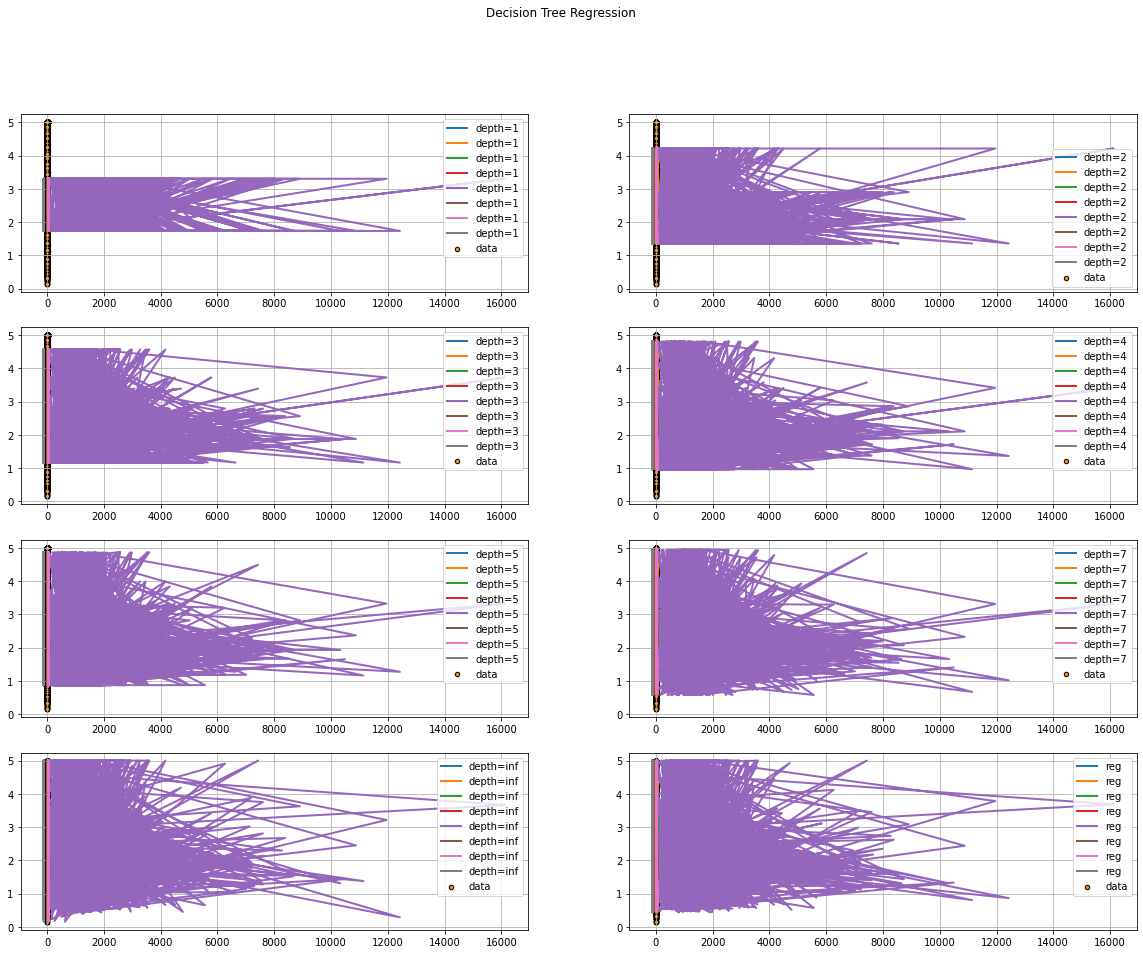

In [97]:
# Plot the results

fig, axa = plt.subplots(4,2, figsize=(20,15))
for i, (key , cur_pred) in enumerate(pred_list.items()):
    ax = axa[i//2,i%2]
    ax.scatter(X['MedInc'], y, s=20, edgecolor="black",c="darkorange", label="data")
    ax.plot(X_test, cur_pred,label=f"{key}", linewidth=2)
    ax.grid()
    ax.legend()

fig.suptitle("Decision Tree Regression")
plt.show()